In [ ]:
import sys
sys.path.append('./models/')
from Arima import ARIMA_Model
from SIR  import *
from exponential_regression import ExponentialRegression
from moving_average import MovingAverage
from Truth import Truth
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from evaluate_model import evaluate_model
import json

df = pd.read_csv('deaths_and_infections.csv')

# remove a columns from a df: 
df.drop(columns=['Unnamed: 0'], inplace=True)
new_deaths=np.array(df['new_deaths'])
death_cumul=np.array([sum(new_deaths[:i]) for i in range(len(new_deaths))])
dates_of_pandemic=np.arange(len(new_deaths))

c:\Users\grego\Documents\code\covid_internship\./models\SIR.py:327: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert(len(vars)==reach, str(len(vars)) + 'different from ' + str(reach))


In [ ]:
models = ['SIRD', 'ExponentialRegression', 'MovingAverage', 'Arima']

In [ ]:
myarima=ARIMA_Model()
mysir=SIRD_model_2()
myexp=ExponentialRegression()
mymoving=MovingAverage()
truth=Truth()
alphas=np.array([0.02, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
indexs_points=[[30], [40], [50], [60], [70], [80], [90], [100], [110]]
reach=7
weights=np.concatenate((0.5, alphas * 0.5))
dicoresults=dict()
dicoresults=dict()

if False: 
    for index_points in indexs_points:
        try: 
            perf_sir=evaluate_model(model=mysir, data=new_deaths, alphas=alphas, evaluation_point_indexs=index_points, reach=reach, weights=weights)
        except :
            perf_sir=np.inf
        try:  
            perf_exp=evaluate_model(model=myexp, data=new_deaths, alphas=alphas, evaluation_point_indexs=index_points, reach=reach, weights=weights)
        except:
            perf_exp=np.inf
        try:
            perf_moving=evaluate_model(model=mymoving, data=new_deaths, alphas=alphas, evaluation_point_indexs=index_points, reach=reach, weights=weights)
        except: 
            perf_moving=np.inf
        try:
            perf_arima=evaluate_model(model=myarima, data=new_deaths, alphas=alphas, evaluation_point_indexs=index_points, reach=reach, weights=weights)
        except:
            perf_arima=np.inf
        dicoresults[str(index_points)]=[perf_sir, perf_exp, perf_moving, perf_arima]
        
    # write results: 
    with open('comparing_models.json', 'w') as f:
        json.dump(dicoresults, f)

In [ ]:
myarima=ARIMA_Model()
mysir=SIRD_model_2()
myexp=ExponentialRegression()
mymoving=MovingAverage()
truth=Truth()
alphas=np.array([0.02, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
indexs_points=[[30], [40], [50], [60], [70], [80], [90], [100], [110]]
reach=14
weights=np.concatenate((0.5, alphas * 0.5))
dicoresults=dict()


if False: 
    for index_points in indexs_points:
        try: 
            perf_sir=evaluate_model(model=mysir, data=new_deaths, alphas=alphas, evaluation_point_indexs=index_points, reach=reach, weights=weights)
        except :
            perf_sir=np.inf
        try:  
            perf_exp=evaluate_model(model=myexp, data=new_deaths, alphas=alphas, evaluation_point_indexs=index_points, reach=reach, weights=weights)
        except:
            perf_exp=np.inf
        try:
            perf_moving=evaluate_model(model=mymoving, data=new_deaths, alphas=alphas, evaluation_point_indexs=index_points, reach=reach, weights=weights)
        except: 
            perf_moving=np.inf
        try:
            perf_arima=evaluate_model(model=myarima, data=new_deaths, alphas=alphas, evaluation_point_indexs=index_points, reach=reach, weights=weights)
        except:
            perf_arima=np.inf
        dicoresults[str(index_points)]=[perf_sir, perf_exp, perf_moving, perf_arima]
        
    # write results: 
    with open('comparing_models.json', 'w') as f:
        json.dump(dicoresults, f)

In [ ]:
with open('compte_rendu.txt', 'a') as myfile: 
    for point in dicoresults.keys(): 
        myfile.write('For the point: '+point+'\n')
        myfile.write('The best model is ' + models[(np.argmin(dicoresults[point]))]+'\n')
        myfile.write('   ')


In [ ]:
import json

In [ ]:
# load results: 
with open('comparing_models.json', 'r') as f:
    dicoresults = json.load(f)
    

In [ ]:
new_deaths[[5,6]]

array([0., 0.])

Text(0.5, 1.0, 'Points of evaluation and best models for a 7-days ahead prediction')

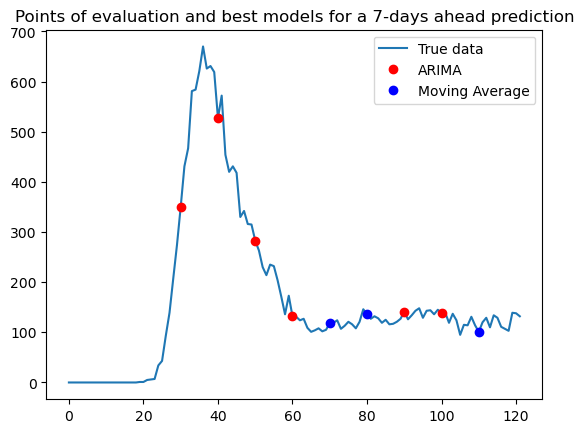

In [ ]:
plt.plot(new_deaths, label='True data')
plt.plot([30, 40, 50, 60, 90, 100], new_deaths[[30, 40, 50, 60, 90, 100]], 'ro', label='ARIMA')
plt.plot( [70, 80, 110], new_deaths[ [70, 80, 110]], 'bo', label= 'Moving Average')
plt.legend()
plt.title('Points of evaluation and best models for a 7-days ahead prediction')

Text(0.5, 1.0, 'Points of evaluation and best models for a 14-days ahead prediction')

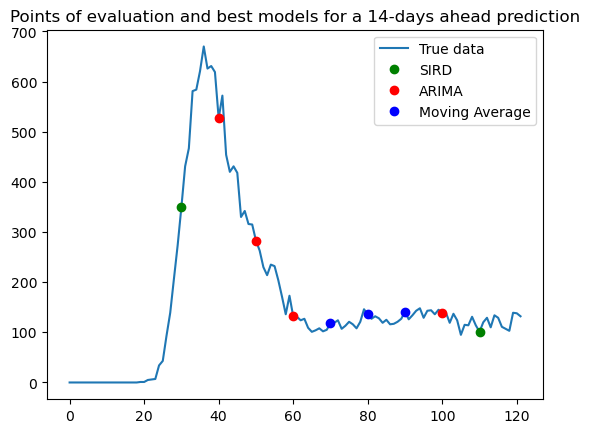

In [ ]:
plt.plot(new_deaths, label='True data')
plt.plot([30, 110], new_deaths[[30,110]],'go',   label='SIRD')
plt.plot([ 40, 50, 60,  100], new_deaths[[ 40, 50, 60,  100]], 'ro', label='ARIMA')
plt.plot( [70, 80, 90], new_deaths[ [70, 80, 90]], 'bo', label= 'Moving Average')
plt.legend()
plt.title('Points of evaluation and best models for a 14-days ahead prediction')